<a href="https://colab.research.google.com/github/hasdasda/HoctheoPhamDinhKhanh/blob/main/satellite_imagery_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install patchify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 80.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [2]:
!pip show wandb

Name: wandb
Version: 0.19.9
Summary: A CLI and library for interacting with the Weights & Biases API.
Home-page: 
Author: 
Author-email: Weights & Biases <support@wandb.com>
License: MIT License

Copyright (c) 2021 Weights and Biases, Inc.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEM

In [1]:
!pip install wandb

In [3]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: phieu2376 (hieubeo) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
!pip install numpy

In [ ]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
!ls -lah '/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset'

total 33K
-rw------- 1 root root  548 May 29  2020  classes.json
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 1'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 2'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 3'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 4'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 5'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 6'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 7'
drwx------ 4 root root 4.0K Mar 27 13:33 'Tile 8'


In [ ]:
dataset_root_folder = '/content/drive/MyDrive/Colab Notebooks/datasets/satellite/'

In [ ]:
dataset_name = "DubaiDataset"

In [ ]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'masks': # 'images
    images = os.listdir(path)
    print(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.png')): # '.jpg
        #print(image_name)
        a = True

/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 2/masks


In [ ]:
import os  # Import thư viện os để làm việc với tệp và thư mục

# Duyệt qua tất cả các thư mục con và tệp trong dataset_root_folder/dataset_name
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder, dataset_name)):
    dir_name = path.split(os.path.sep)[-1]  # Lấy tên thư mục hiện tại bằng cách tách theo dấu '/' hoặc '\\'

    # Kiểm tra nếu thư mục hiện tại có tên là "masks" (có thể thay bằng "images" nếu cần)
    if dir_name == 'masks':
        images = os.listdir(path)  # Lấy danh sách tất cả các tệp trong thư mục "masks"
        print(path)  # In ra đường dẫn của thư mục hiện tại

        # Duyệt qua từng tệp trong danh sách
        for i, image_name in enumerate(images):
            # Kiểm tra nếu tệp có phần mở rộng ".png" (có thể thay bằng ".jpg" nếu muốn)
            if image_name.endswith('.png'):
                # Hiện tại chỉ đặt a = True nhưng chưa sử dụng
                a = True


/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 7/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 3/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 8/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 4/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 1/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 6/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 5/masks
/content/drive/MyDrive/Colab Notebooks/datasets/satellite/DubaiDataset/Tile 2/masks


In [ ]:
image_patch_size = 256

In [ ]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg',1)

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

In [ ]:
len(image_patches)

2

In [ ]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [ ]:
minmaxscaler = MinMaxScaler()

In [ ]:
image_x = image_patches[0,0,:,:]
#MinMaxScaler
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [ ]:
image_y[0].shape

(256, 256, 3)

In [ ]:
print(type(image))

<class 'numpy.ndarray'>


In [ ]:
type(Image.fromarray(image))

PIL.Image.Image

In [ ]:
image.shape

(544, 509, 3)

In [ ]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [ ]:
image_dataset = []
mask_dataset = []

for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)


In [ ]:
import cv2  # Import OpenCV để xử lý ảnh
import numpy as np  # Import NumPy để thao tác với mảng
from PIL import Image  # Import PIL để xử lý ảnh
from patchify import patchify  # Import patchify để chia ảnh thành các mảnh nhỏ
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler để chuẩn hóa dữ liệu

# Khởi tạo danh sách lưu ảnh và mask
image_dataset = []
mask_dataset = []

# Duyệt qua hai loại ảnh: "images" (ảnh gốc) và "masks" (ảnh mặt nạ/nhãn phân vùng)
for image_type in ['images', 'masks']:
    # Xác định phần mở rộng của tệp ảnh tùy theo loại ảnh
    if image_type == 'images':
        image_extension = 'jpg'  # Ảnh gốc có định dạng JPG
    elif image_type == 'masks':
        image_extension = 'png'  # Ảnh mặt nạ có định dạng PNG

    # Lặp qua các Tile (khối ảnh) từ 1 đến 7
    for tile_id in range(1, 8):
        # Lặp qua các ảnh từ 1 đến 19 trong mỗi Tile
        for image_id in range(1, 20):
            # Đọc ảnh từ đường dẫn tương ứng
            image = cv2.imread(
                f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',
                1  # Đọc ảnh màu (BGR)
            )

            # Kiểm tra nếu ảnh tồn tại
            if image is not None:
                # Nếu là ảnh mask, chuyển đổi từ BGR sang RGB để phù hợp với xử lý
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Xác định kích thước chuẩn của ảnh sao cho có thể chia hết thành các patch nhỏ
                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size

                # Chuyển đổi ảnh từ NumPy array sang định dạng PIL Image để xử lý
                image = Image.fromarray(image)

                # Cắt ảnh sao cho kích thước vừa đúng với các patch nhỏ
                image = image.crop((0, 0, size_x, size_y))

                # Chuyển ảnh trở lại dạng NumPy array sau khi cắt
                image = np.array(image)

                # Chia ảnh thành các patch nhỏ có kích thước (image_patch_size, image_patch_size, 3)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                # Lặp qua từng patch nhỏ trong ảnh
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':  # Nếu là ảnh gốc
                            individual_patched_image = patched_images[i, j, :, :]

                            # Chuẩn hóa ảnh bằng MinMaxScaler để đưa giá trị pixel về khoảng [0,1]
                            individual_patched_image = minmaxscaler.fit_transform(
                                individual_patched_image.reshape(-1, individual_patched_image.shape[-1])
                            ).reshape(individual_patched_image.shape)

                            # Lưu patch đã chuẩn hóa vào danh sách ảnh
                            individual_patched_image = individual_patched_image[0]  # Loại bỏ chiều không cần thiết
                            image_dataset.append(individual_patched_image)

                        elif image_type == 'masks':  # Nếu là ảnh mask
                            individual_patched_mask = patched_images[i, j, :, :]

                            # Lưu patch của mask vào danh sách mask_dataset
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)


In [ ]:
# Khởi tạo danh sách lưu ảnh và mask
image_dataset = []
mask_dataset = []

# Duyệt qua hai loại ảnh: "images" (ảnh gốc) và "masks" (ảnh mặt nạ/nhãn phân vùng)
for image_type in ['images', 'masks']:
    # Xác định phần mở rộng của tệp ảnh tùy theo loại ảnh
    if image_type == 'images':
        image_extension = 'jpg'  # Ảnh gốc có định dạng JPG
    elif image_type == 'masks':
        image_extension = 'png'  # Ảnh mặt nạ có định dạng PNG

    # Lặp qua các Tile (khối ảnh) từ 1 đến 7
    for tile_id in range(1, 8):
        # Lặp qua các ảnh từ 1 đến 19 trong mỗi Tile
        for image_id in range(1, 20):
            # Đọc ảnh từ đường dẫn tương ứng
            image = cv2.imread(
                f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',
                1  # Đọc ảnh màu (BGR)
            )

            # Kiểm tra nếu ảnh tồn tại
            if image is not None:
                # Nếu là ảnh mask, chuyển đổi từ BGR sang RGB để phù hợp với xử lý
                if image_type == 'masks':
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

                # Xác định kích thước chuẩn của ảnh sao cho có thể chia hết thành các patch nhỏ
                size_x = (image.shape[1] // image_patch_size) * image_patch_size
                size_y = (image.shape[0] // image_patch_size) * image_patch_size

                # Chuyển đổi ảnh từ NumPy array sang định dạng PIL Image để xử lý
                image = Image.fromarray(image)

                # Cắt ảnh sao cho kích thước vừa đúng với các patch nhỏ
                image = image.crop((0, 0, size_x, size_y))

                # Chuyển ảnh trở lại dạng NumPy array sau khi cắt
                image = np.array(image)

                # Chia ảnh thành các patch nhỏ có kích thước (image_patch_size, image_patch_size, 3)
                patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)

                # Lặp qua từng patch nhỏ trong ảnh
                for i in range(patched_images.shape[0]):
                    for j in range(patched_images.shape[1]):
                        if image_type == 'images':  # Nếu là ảnh gốc
                            individual_patched_image = patched_images[i, j, :, :]

                            # Chuẩn hóa ảnh bằng MinMaxScaler để đưa giá trị pixel về khoảng [0,1]
                            individual_patched_image = minmaxscaler.fit_transform(
                                individual_patched_image.reshape(-1, individual_patched_image.shape[-1])
                            ).reshape(individual_patched_image.shape)

                            # Lưu patch đã chuẩn hóa vào danh sách ảnh
                            individual_patched_image = individual_patched_image[0]  # Loại bỏ chiều không cần thiết
                            image_dataset.append(individual_patched_image)

                        elif image_type == 'masks':  # Nếu là ảnh mask
                            individual_patched_mask = patched_images[i, j, :, :]

                            # Lưu patch của mask vào danh sách mask_dataset
                            individual_patched_mask = individual_patched_mask[0]
                            mask_dataset.append(individual_patched_mask)


In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [ ]:
type(image_dataset[0])

numpy.ndarray

In [ ]:
type(np.reshape(image_dataset[0], (image_patch_size, image_patch_size, 3)))

numpy.ndarray

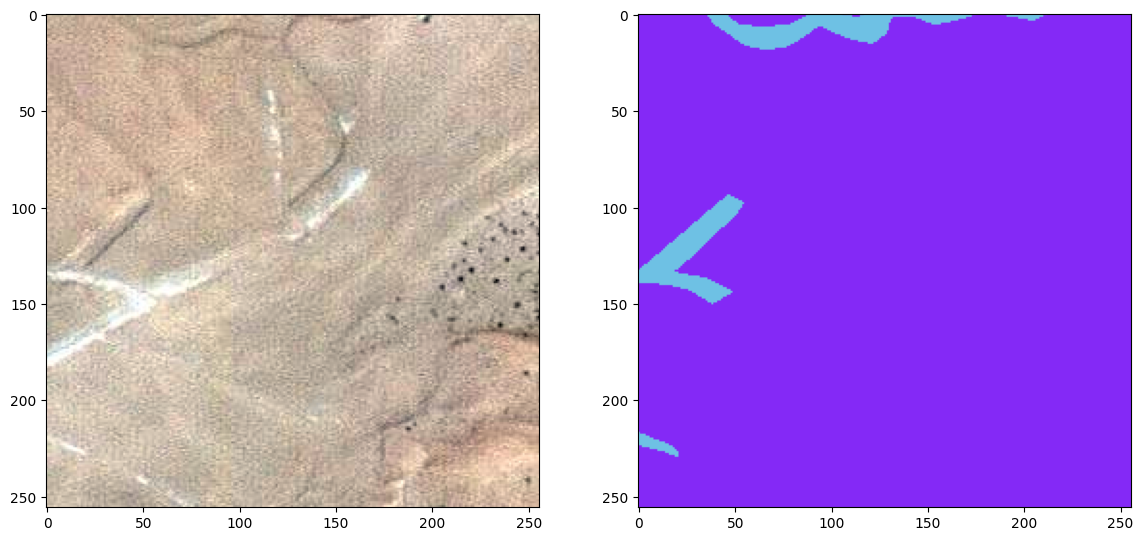

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [ ]:
import numpy as np  # Import thư viện numpy để xử lý mảng

# Chuyển đổi mã màu HEX của "building" (tòa nhà) sang giá trị RGB
class_building = '#3C1098'  # Mã màu HEX của "building"
class_building = class_building.lstrip('#')  # Loại bỏ ký tự '#' ở đầu chuỗi
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0, 2, 4)))  # Chuyển từng cặp ký tự HEX thành giá trị RGB
print(class_building)  # In giá trị RGB ra màn hình

# Chuyển đổi mã màu HEX của "land" (đất) sang giá trị RGB
class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0, 2, 4)))
print(class_land)

# Chuyển đổi mã màu HEX của "road" (đường) sang giá trị RGB
class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0, 2, 4)))
print(class_road)

# Chuyển đổi mã màu HEX của "vegetation" (thảm thực vật) sang giá trị RGB
class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0, 2, 4)))
print(class_vegetation)

# Chuyển đổi mã màu HEX của "water" (nước) sang giá trị RGB
class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0, 2, 4)))
print(class_water)

# Chuyển đổi mã màu HEX của "unlabeled" (không phân loại) sang giá trị RGB
class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0, 2, 4)))
print(class_unlabeled)


[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [ ]:
mask_dataset.shape[0]

945

In [ ]:
label = individual_patched_mask

In [ ]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  #print(label_segment)
  label_segment = label_segment[:,:,0]
  #print(label_segment)
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [ ]:
print(len(labels))

945


In [ ]:
labels = np.array(labels)

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
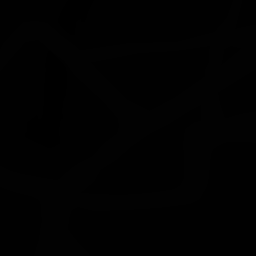

In [ ]:
labels[3]

In [ ]:
labels = np.expand_dims(labels, axis=3)

In [ ]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [ ]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
print("Total unique labels based on masks: ",format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


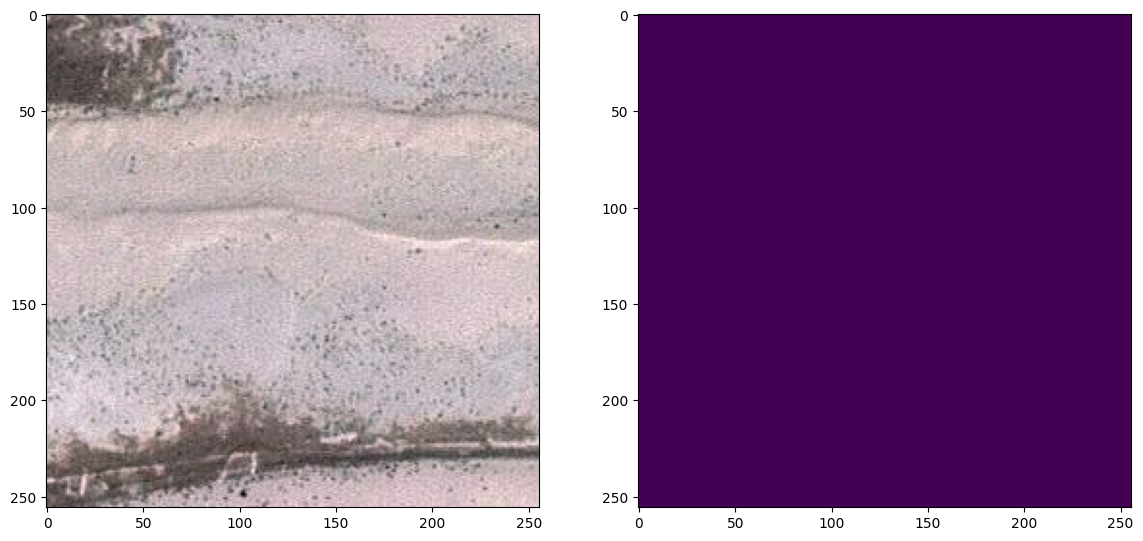

In [ ]:
random_image_id = random.randint(0, len(image_dataset))

plt.figure(figsize=(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)
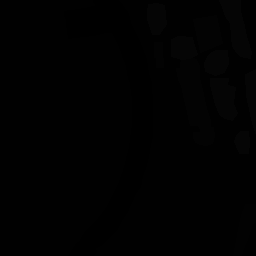

In [ ]:
labels[0][:,:,0]

In [ ]:
total_classes = len(np.unique(labels))

In [ ]:
total_classes

6

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
labels_categorical_dataset = to_categorical(labels, num_classes=total_classes)

In [ ]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [ ]:
master_trianing_dataset = image_dataset

In [ ]:
master_trianing_dataset.shape

(945, 256, 256, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(master_trianing_dataset, labels_categorical_dataset, test_size=0.15, random_state=100)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [ ]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [ ]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras import backend as K

In [ ]:
def jaccard_còefficient(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
    # Định nghĩa đầu vào của mô hình với kích thước ảnh và số kênh màu
    inputs = Input((image_height, image_width, image_channels))
    source_input = inputs

    # Encoder - Tích chập và giảm kích thước ảnh
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)  # Giảm kích thước còn 1/2

    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    # Bottleneck - Lớp trung tâm của mô hình
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

    # Decoder - Tăng kích thước ảnh dần lên bằng Conv2DTranspose
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
    u6 = concatenate([u6, c4])  # Kết hợp với đặc trưng từ encoder
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

    # Lớp đầu ra với số lớp phân loại và softmax
    outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)

    # Tạo mô hình Keras
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [ ]:
# # Có thể thử với một vài pretrained model có sẵn
# import segmentation_models as sm
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input

# def get_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):
#     sm.set_framework('tf.keras')
#     sm.framework()

#     base_model = sm.Unet(
#         backbone_name="resnet34",  # Hoặc các backbone khác như "efficientnetb0", "vgg16"
#         encoder_weights="imagenet",  # Có thể đặt None nếu không muốn dùng trọng số pre-trained
#         input_shape=(image_height, image_width, image_channels),
#         classes=n_classes,
#         activation="softmax"  # Đổi thành "sigmoid" nếu là bài toán phân loại nhị phân
#     )

#     return base_model

In [ ]:
metrics = ['accuracy', jaccard_còefficient]

In [ ]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [ ]:
model = get_deep_learning_model()

In [ ]:
model.get_config()

{'name': 'functional',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'name': 'input_layer'},
   'registered_name': None,
   'name': 'input_layer',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': {'module': 'keras',
     'class_name': 'DTypePolicy',
     'config': {'name': 'float32'},
     'registered_name': None},
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'cla

### Generating Loss Function

In [ ]:
weights = [0.155,0.155,0.155,0.155,0.155,0.155,]

In [ ]:
!pip install -U segmentation_models

In [ ]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

Segmentation Models: using `tf.keras` framework.


In [ ]:
import segmentation_models as sm

In [ ]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [ ]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [ ]:
total_loss = dice_loss + (1 * focal_loss)

### Model compilation

In [ ]:
import tensorflow as tf


tf.keras.backend.clear_session()



model.compile(optimizer="adam", loss=total_loss, metrics=metrics)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        448 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 256, 256,  │          0 │ conv2d[0][0]      │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,320 │ dropout[0][0]     │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,640 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 128, 128,  │          0 │ conv2d_2[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      9,248 │ dropout_1[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │     18,496 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64,    │          0 │ conv2d_4[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │     36,928 │ dropout_2[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32, 32,    │          0 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │    147,584 │ dropout_3[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]  

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.utils import plot_model


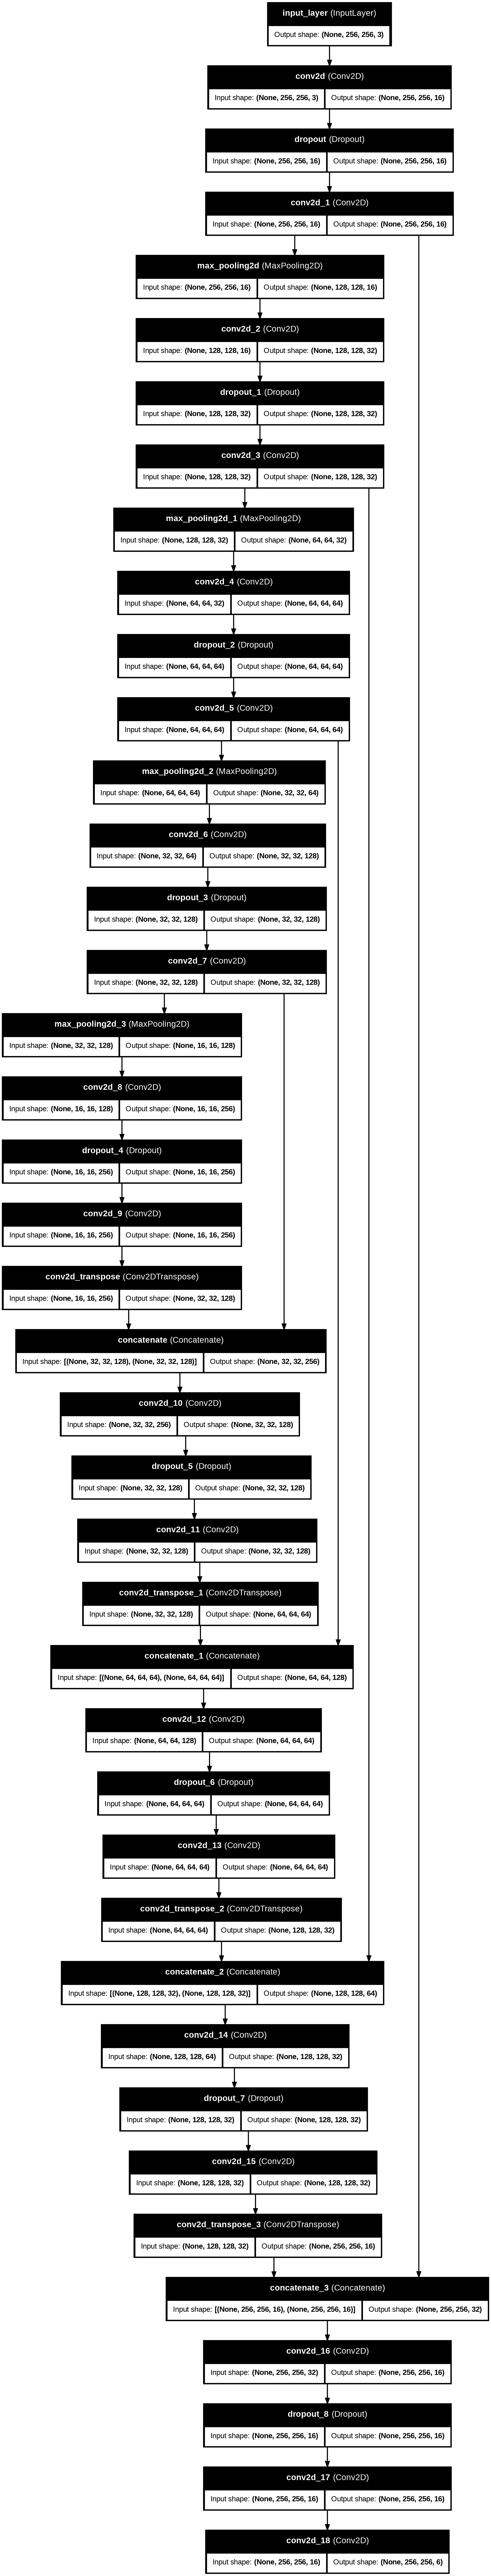

In [ ]:
plot_model(model, to_file='satelite_model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
import keras
from IPython.display import clear_output
%matplotlib inline

In [ ]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)

        # Sử dụng jaccard coefficient thay vì loss
        self.losses.append(logs.get('jaccard_coef'))
        self.val_losses.append(logs.get('val_jaccard_coef'))

        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_jaccard_loss")
        plt.legend()
        plt.show()

plot_loss = PlotLoss()

NameError: name 'keras' is not defined

In [9]:
import wandb
from wandb.keras import WandbCallback

In [11]:
wandb.init(project="satelite-segmantation-diadanh-images")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: phieu2376 (hieubeo) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [ ]:
model_history = model.fit(X_train, y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=100,
                          validation_data=(X_test, y_test),
                          shuffle=False)

NameError: name 'model' is not defined

In [ ]:
history_a =model_history

In [ ]:
history_a.history

In [ ]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
model_history.params

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
len(y_pred)

In [ ]:
y_pred

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [ ]:
len(y_pred_argmax)

In [ ]:
y_pred_argmax

### Comparing prediction results
* using test images using mask images and predicted result images.

In [ ]:
import random

In [ ]:
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


# Model saving and reloading (with custom loss and custom metrics)

- loss
  - 'dice_loss_plus_1focal_loss': total_loss
- Metrics
  - jaccard_coef: jaccard_coef

In [ ]:
#model.get_config()

In [ ]:
model.save('satellite-imagery.h5')

In [ ]:
!ls -lah

In [ ]:
from keras.models import load_model

In [ ]:
saved_model = load_model('/content/satellite-imagery.h5',
                         custom_objects=({'dice_loss_plus_1focal_loss': total_loss,
                                          'jaccard_coef': jaccard_coef}))

In [ ]:
model.loss.name

In [ ]:
#saved_model.get_config()

## Performing Prediction using the custom image from Google Map

In [ ]:
plt.imshow(Image.open('/content/fc-img1.jpg'))

In [ ]:
plt.imshow(Image.open('/content/fc-img2.jpg'))

In [ ]:
image = Image.open('/content/fc-img1.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image, 0)

In [ ]:
prediction = saved_model.predict(image)


In [ ]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('/content/fc-img1.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

In [ ]:
s